In [6]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def versions():
    print("Python version:\n{}\n".format(sys.version))
    print("matplotlib version: {}".format(matplotlib.__version__))
    print("pandas version: {}".format(pd.__version__))
    print("numpy version: {}".format(np.__version__))
    print("seaborn version: {}".format(sns.__version__))
    print("scikit-learn version: {}".format(sklearn.__version__))

versions()

Python version:
3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

matplotlib version: 2.2.0
pandas version: 0.20.3
numpy version: 1.14.1
seaborn version: 0.8.1
scikit-learn version: 0.19.1


In [42]:
# make up data
data = np.random.uniform(0, 10, [100, 5])

TypeError: cannot convert dictionary update sequence element #0 to a sequence

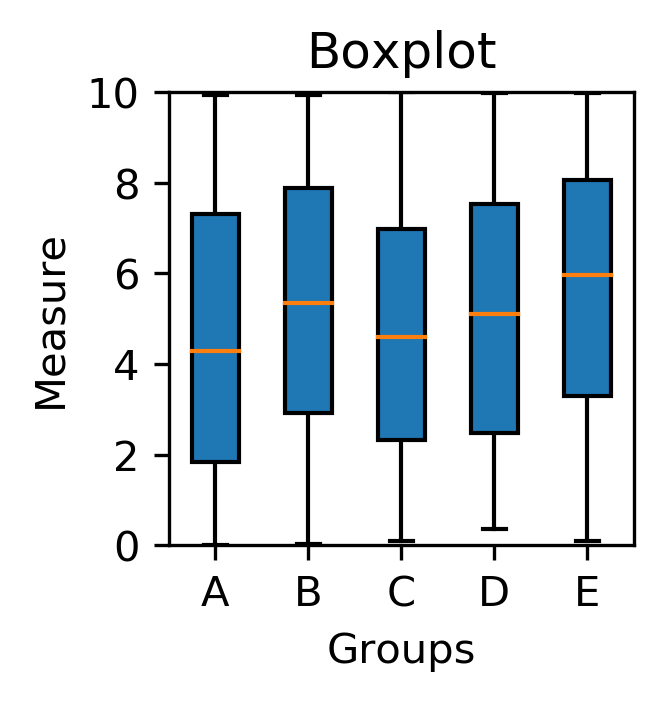

In [64]:
# make a figure
nrows=1
ncols=1
width=2
height=2
dpi=300
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height), dpi=dpi, 
                       sharex=False, sharey=False, facecolor='w', frameon=False)

# boxplot
bp = ax.boxplot(data, patch_artist=True)
# set title
ax.set_title('Boxplot')
# set x axis label
ax.set_xlabel('Groups')
#set y axis label
ax.set_ylabel('Measure')
#set y axis limits
ax.set_ylim(0, 10)
# set x tick labels
ax.set_xticklabels(['A', 'B', 'C', 'D', 'E'])
# set y tick labels
ax.set_yticklabels([2, 4, 6, 8])
#set color or boxes
box_colors=['salmon', 'cornflowerblue', 'lightgreen', 'mediumpurple', 'lightpink']
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
plt.show()